In [3]:
from pyspark.sql.types import LongType
from pyspark.sql import functions as F
from pyspark.sql import SparkSession

In [4]:
spark = SparkSession.builder.appName("UDF")\
        .getOrCreate()

### Introduction to UDF: User Defined Functions
1) It extends the capability of Spark by defining our own functions in Python.<br>
2) PySpark doesn't provide all the possible transformations. For example: you want to select middle letter in a string column. You cannot do it straight away using PySpark built-in functions. In this case, you can write a udf python function and use it to transform a PySpark DataFrame.<br>
3) If the UDF is not properly created, the you might face performance issues. So, you have to create the function in a optimal way.<br>
#### NOTE: Use udf functions, if there are no in-built Spark SQL functions to achieve that task.

In [5]:
#create cubed function
def cubed(s):
    return s*s*s

In [10]:
# Method1
df = spark.range(1,5)
u_method1 = F.udf(cubed, LongType())
result1 = df.withColumn("cubed_column", u_method1("id"))
result1.show()

+---+------------+
| id|cubed_column|
+---+------------+
|  1|           1|
|  2|           8|
|  3|          27|
|  4|          64|
+---+------------+



In [11]:
#Method2
spark.udf.register("cubed",F.udf(cubed, LongType()))
spark.range(1,5).createOrReplaceTempView("udf_view")
result2 = spark.sql("select id, cubed(id) as cubed_column from udf_view")
result2.show()

+---+------------+
| id|cubed_column|
+---+------------+
|  1|           1|
|  2|           8|
|  3|          27|
|  4|          64|
+---+------------+



In [18]:
''' Errors occured while executing method1 and 2 that : Mismatch Between Python Version in Spark Worker and Spark Driver
    Solution : Set environment variable for PYSPARK_PYTHON (give path to the python exe file) if also same error occurs then 
    reinstall anaconda (if you're using anaconda) with same python version as the above given to PYSPARK_PYTHON '''

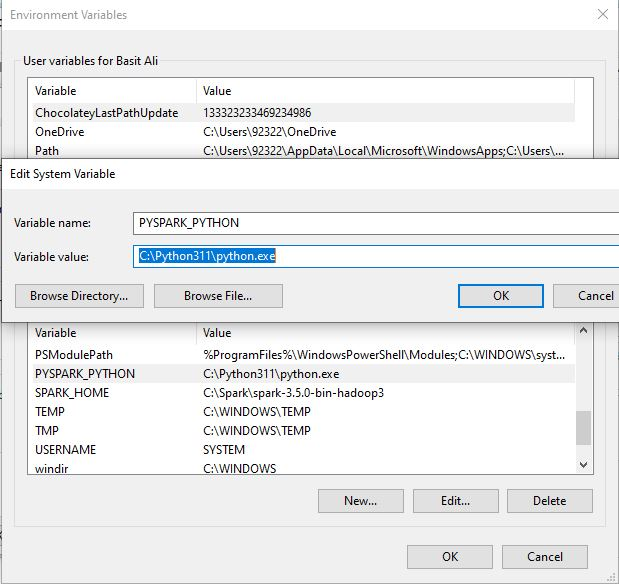

### Speeding up and distributing PySpark UDFs with pandas UDFs  

In [16]:
import pandas as pd
from pyspark.sql.functions import pandas_udf
cubed_udf = pandas_udf(cubed, LongType())
x = pd.Series([1,2,3])
cubed(x)

0     1
1     8
2    27
dtype: int64

1) Unless your data is large enough such that it cannot be processed by just one node spark should not be considered. 
2) Pandas perform all its operation on single node while spark distributes the data to multiple nodes for processing.

### If you compare performance over small set of data, pandas can outperform spark. 